## Libraries

In [1]:
import numpy as np
import pandas as pd
import joblib
import statsmodels.formula.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
plt.style.use('seaborn-whitegrid')
sns.set()


In [2]:
df=pd.read_csv('../input/bank-marketing-dataset-analysis-classification/bank-full.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


#### Categorigal Values

In [4]:
df['y']=df['y'].map({'yes':1,'no':0})
df['default']=df['default'].map({'yes':1,'no':0})
df['housing']=df['housing'].map({'yes':1,'no':0})
df['loan']=df['loan'].map({'yes':1,'no':0})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
cat=df.select_dtypes(include=object)
cal_columns=cat.columns

In [6]:
cal_columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

#### Numerical Valuse

In [7]:
numeric=df.select_dtypes(include=np.number)
numeric_colums=numeric.columns
numeric_colums

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y'],
      dtype='object')

#### Ploting the figure

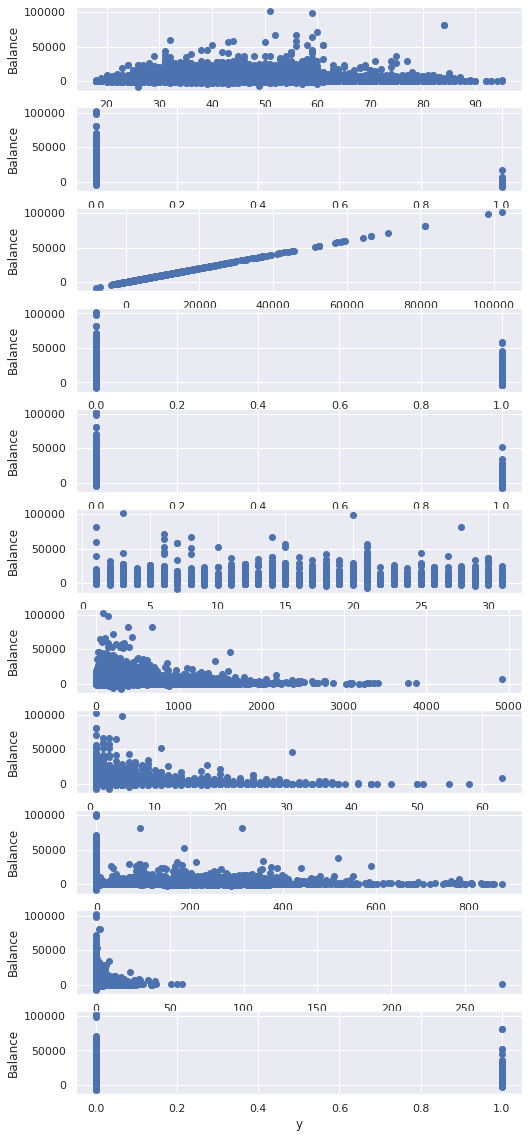

In [8]:
# plt.figure(1)
plt.figure(figsize=(8,20))
for i in range(len(numeric_colums)):
    plt.subplot(len(numeric_colums),1,i+1)
    plt.scatter(df[numeric_colums[i]],df['balance'])
    plt.xlabel(numeric_colums[i])
    plt.ylabel('Balance');


In [9]:
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


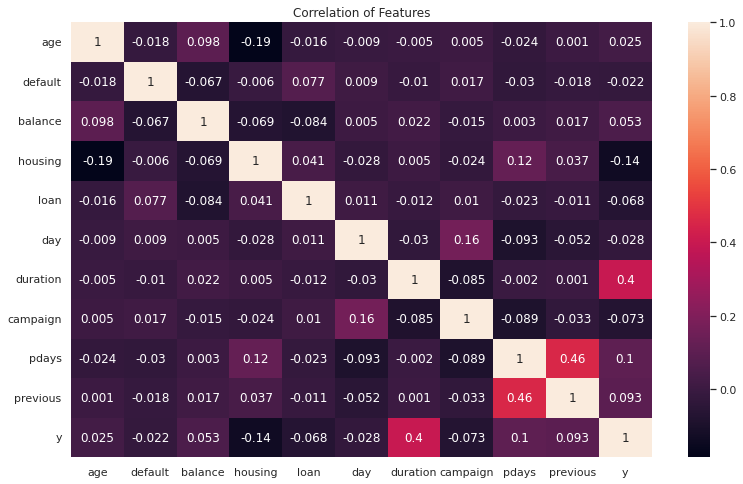

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr().round(3), annot=True)
plt.title('Correlation of Features')
plt.show()

In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [12]:
cal_columns

Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object')

In [13]:
df.corr()['y']

age         0.025155
default    -0.022419
balance     0.052838
housing    -0.139173
loan       -0.068185
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
y           1.000000
Name: y, dtype: float64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


In [15]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [16]:
df[cal_columns].head()

,job,marital,education,contact,month,poutcome
0,management,married,tertiary,unknown,may,unknown
1,technician,single,secondary,unknown,may,unknown
2,entrepreneur,married,secondary,unknown,may,unknown
3,blue-collar,married,unknown,unknown,may,unknown
4,unknown,single,unknown,unknown,may,unknown


In [17]:
numeric_colums
scaler=MinMaxScaler()
scaler.fit(df[numeric_colums])
df[numeric_colums]=scaler.transform(df[numeric_colums])

In [18]:
enc=OneHotEncoder(sparse=False,handle_unknown='ignore')
enc.fit(df[cal_columns])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [19]:
enc.categories_

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed', 'unknown'], dtype=object),
 array(['divorced', 'married', 'single'], dtype=object),
 array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 array(['cellular', 'telephone', 'unknown'], dtype=object),
 array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object),
 array(['failure', 'other', 'success', 'unknown'], dtype=object)]

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,0.0,0.092259,1.0,0.0,unknown,0.133333,may,0.053070,0.0,0.0,0.0,unknown,0.0
1,0.337662,technician,single,secondary,0.0,0.073067,1.0,0.0,unknown,0.133333,may,0.030704,0.0,0.0,0.0,unknown,0.0
2,0.194805,entrepreneur,married,secondary,0.0,0.072822,1.0,1.0,unknown,0.133333,may,0.015453,0.0,0.0,0.0,unknown,0.0
3,0.376623,blue-collar,married,unknown,0.0,0.086476,1.0,0.0,unknown,0.133333,may,0.018707,0.0,0.0,0.0,unknown,0.0
4,0.194805,unknown,single,unknown,0.0,0.072812,0.0,0.0,unknown,0.133333,may,0.040260,0.0,0.0,0.0,unknown,0.0


In [21]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0.519481,management,married,tertiary,0.0,0.092259,1.0,0.0,unknown,0.133333,may,0.053070,0.000000,0.000000,0.000000,unknown,0.0
1,0.337662,technician,single,secondary,0.0,0.073067,1.0,0.0,unknown,0.133333,may,0.030704,0.000000,0.000000,0.000000,unknown,0.0
2,0.194805,entrepreneur,married,secondary,0.0,0.072822,1.0,1.0,unknown,0.133333,may,0.015453,0.000000,0.000000,0.000000,unknown,0.0
3,0.376623,blue-collar,married,unknown,0.0,0.086476,1.0,0.0,unknown,0.133333,may,0.018707,0.000000,0.000000,0.000000,unknown,0.0
4,0.194805,unknown,single,unknown,0.0,0.072812,0.0,0.0,unknown,0.133333,may,0.040260,0.000000,0.000000,0.000000,unknown,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,technician,married,tertiary,0.0,0.080293,0.0,0.0,cellular,0.533333,nov,0.198658,0.032258,0.000000,0.000000,unknown,1.0
45207,0.688312,retired,divorced,primary,0.0,0.088501,0.0,0.0,cellular,0.533333,nov,0.092721,0.016129,0.000000,0.000000,unknown,1.0
45208,0.701299,retired,married,secondary,0.0,0.124689,0.0,0.0,cellular,0.533333,nov,0.229158,0.064516,0.212156,0.010909,success,1.0
45209,0.506494,blue-collar,married,secondary,0.0,0.078868,0.0,0.0,telephone,0.533333,nov,0.103294,0.048387,0.000000,0.000000,unknown,0.0


In [22]:
ohe_columns=list(enc.get_feature_names(cal_columns))
df[ohe_columns]=enc.transform(df[cal_columns])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
df.drop(columns=cal_columns,axis=1,inplace=True)
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

## Applying Machine Learning

In [24]:
df.shape

(45211, 49)

### Spliting the dataset using train_test_split

In [25]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns='y',axis=1),df['y'],random_state=42,test_size=0.25)

In [26]:
X_train.shape

(33908, 48)

In [27]:
X_test.shape

(11303, 48)

In [28]:
model=LogisticRegression(max_iter=10000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8984340440590993

In [29]:
solverr=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
a=[]


In [30]:
for i in solverr:
    model=LogisticRegression(solver=i,max_iter=10000)
    model.fit(X_train,y_train)
    a.append(model.score(X_test,y_test))

In [31]:
pd.DataFrame({'Solver':solverr,'Score':a})

,Solver,Score
0,newton-cg,0.898434
1,lbfgs,0.898434
2,liblinear,0.898346
3,sag,0.898346
4,saga,0.898434


### Random Forest Classifier

In [32]:
model_rfr=RandomForestClassifier(
n_estimators=100)
model_rfr.fit(X_train,y_train)
model_rfr.score(X_test,y_test)

0.9037423692824914

In [33]:
model_rfr.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
y_test

3776     0.0
9928     0.0
33409    0.0
31885    0.0
15738    0.0
        ... 
13847    0.0
10200    0.0
32106    1.0
25565    0.0
12758    1.0
Name: y, Length: 11303, dtype: float64

#### Hyptertunning of Random Forest Classifier

In [35]:
def calcul(m):
    model_rfr=RandomForestClassifier(max_depth=i)
    model_rfr.fit(X_train,y_train)
    s_train=model_rfr.score(X_train,y_train)
    s_test=model_rfr.score(X_test,y_test)
    return {'max_def':m,'Train Score':s_train,'Test Score':s_test}

In [36]:
a=[]
for i in range(1,21):
    a.append(calcul(i))
df_socre_rfc=pd.DataFrame(a)

In [37]:
df_socre_rfc.head()

,max_def,Train Score,Test Score
0,1,0.883921,0.880297
1,2,0.883921,0.880297
2,3,0.884246,0.880474
3,4,0.886988,0.882686
4,5,0.893182,0.890737


Text(0, 0.5, 'Score')

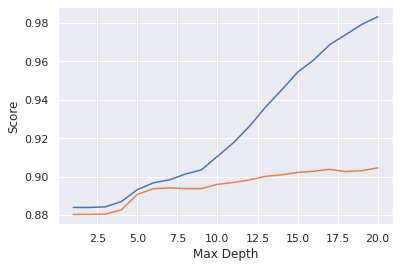

In [38]:
plt.plot(df_socre_rfc.max_def,df_socre_rfc['Train Score'])
plt.plot(df_socre_rfc.max_def,df_socre_rfc['Test Score'])
plt.xlabel("Max Depth")
plt.ylabel("Score")

In [39]:
final_y={
    'model':model_rfr,
    'numerical_cols':numeric_colums,
    'categorical_cols':cal_columns,
    'scaler':scaler,
    'ohencoder':enc,
    'input_cols':X_train.columns,
    'target_col':y_train,
    'encoded_cols':ohe_columns
}

In [40]:
joblib.dump(final_y,'bank_marker')

['bank_marker']

In [41]:
bank=joblib.load('bank_marker')

In [42]:
bank

{'model': RandomForestClassifier(),
 'numerical_cols': Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
        'campaign', 'pdays', 'previous', 'y'],
       dtype='object'),
 'categorical_cols': Index(['job', 'marital', 'education', 'contact', 'month', 'poutcome'], dtype='object'),
 'scaler': MinMaxScaler(),
 'ohencoder': OneHotEncoder(handle_unknown='ignore', sparse=False),
 'input_cols': Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
        'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
        'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
        'job_self-employed', 'job_services', 'job_student', 'job_technician',
        'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
        'marital_single', 'education_primary', 'education_secondary',
        'education_tertiary', 'education_unknown', 'contact_cellular',
        'contact_telephone', 'contact_unknown', 'month_a

### Using Deep Learning

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Softmax,Conv2D,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,CSVLogger

In [44]:
model=Sequential([
    #Flatten(input_shape=X_train.sample().shape),
    Dense(64,activation='relu',input_shape=[48]),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(16,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

2022-05-31 19:24:50.401370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 19:24:50.564288: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 19:24:50.565064: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-31 19:24:50.566250: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                3136      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 1

In [46]:
early_stop=EarlyStopping(monitor='val_loss',patience=3,verbose=1)
log_csv=CSVLogger('my_logs.csv',separator=',',append=False)

In [47]:
checkpoint_best=ModelCheckpoint(filepath='checkpoint_cnn',
                               save_weights_only=True,
                               save_freq='epoch',
                               monitor='val_accuracy',
                               save_best_only=True,
                               verbose=1)

In [48]:
callbacks_list=[early_stop,log_csv,checkpoint_best]

In [49]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history=model.fit(X_train,y_train,epochs=100,batch_size=48,validation_data=(X_test,y_test),callbacks=callbacks_list)

2022-05-31 19:24:53.908864: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
707/707 [==============================] - 4s 3ms/step - loss: 0.3883 - accuracy: 0.8802 - val_loss: 0.3466 - val_accuracy: 0.8803

Epoch 00001: val_accuracy improved from -inf to 0.88030, saving model to checkpoint_cnn
Epoch 2/100
707/707 [==============================] - 2s 3ms/step - loss: 0.3494 - accuracy: 0.8839 - val_loss: 0.3368 - val_accuracy: 0.8803

Epoch 00002: val_accuracy did not improve from 0.88030
Epoch 3/100
707/707 [==============================] - 2s 3ms/step - loss: 0.3404 - accuracy: 0.8839 - val_loss: 0.3304 - val_accuracy: 0.8803

Epoch 00003: val_accuracy did not improve from 0.88030
Epoch 4/100
707/707 [==============================] - 2s 3ms/step - loss: 0.3345 - accuracy: 0.8839 - val_loss: 0.3265 - val_accuracy: 0.8803

Epoch 00004: val_accuracy did not improve from 0.88030
Epoch 5/100
707/707 [==============================] - 2s 3ms/step - loss: 0.3294 - accuracy: 0.8840 - val_loss: 0.3234 - val_accuracy: 0.8803

Epoch 00005: val_accuracy d

In [51]:
df_logs=pd.read_csv('my_logs.csv')

In [52]:
df_logs.head()

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.880205,0.388261,0.880297,0.346552
1,1,0.883921,0.349350,0.880297,0.336757
2,2,0.883921,0.340377,0.880297,0.330377
3,3,0.883921,0.334520,0.880297,0.326539
4,4,0.883951,0.329391,0.880297,0.323421


In [53]:
# predicting
y_predict=model.predict(X_test)
y_predict

array([[0.00477653],
       [0.0038975 ],
       [0.20814016],
       ...,
       [0.01341253],
       [0.03792862],
       [0.2306305 ]], dtype=float32)

In [54]:
y_predict=[1 if i>0.5 else 0 for i in y_predict]
y_predict

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
